# Pré-processamento dos dados das exportações do RN
## Etapa 3 - Engenharia de atributos

<img height="200" src="https://share-eric.eu/fileadmin/_processed_/b/5/csm_dataheader_ec9ee966be.jpg" width="600"/>

# Carregando base de dados das exportações do RN após etapa 2 de pre-processamento

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats


In [2]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_sem_outliers = pd.read_csv('../../../data/interim/preprocessing/02_dataset_expo_rn_NO_OUTLIERS.csv')
dataset_exportacoes_com_outliers = pd.read_csv('../../../data/interim/preprocessing/02_dataset_expo_rn_OUTLIERS.csv')
dataset_exportacoes_com_outliers

,Unnamed: 0.1,Unnamed: 0,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,0,0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,14906,11675,15,2024-09-01
1,1,1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,10,6,8,11130,1294,1294,2024-09-01
2,2,2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,38824,22782,22782,2024-09-01
3,3,3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,1915,1482,2,2024-09-01
4,4,4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,10,6,8,58126,9825,9825,2024-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,57130,57130,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,3,16,8,9696,4640,0,1997-01-01
57131,57131,57131,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,40640,30275,0,1997-01-01
57132,57132,57132,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,34060,26720,0,1997-01-01
57133,57133,57133,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,2,2,8,45276,14000,14,1997-01-01


# Criação de coluna soma mensal e soma anual para 'Valor US$ FOB' e 'Quilograma Líquido'

In [3]:
import pandas as pd

# Convertendo a coluna de data para o formato datetime
dataset_exportacoes_com_outliers['Data'] = pd.to_datetime(dataset_exportacoes_com_outliers['Data'], errors='coerce')
dataset_exportacoes_sem_outliers['Data'] = pd.to_datetime(dataset_exportacoes_sem_outliers['Data'], errors='coerce')

# Extraindo ano e mês da coluna de data
dataset_exportacoes_com_outliers['ano'] = dataset_exportacoes_com_outliers['Data'].dt.year
dataset_exportacoes_com_outliers['mes'] = dataset_exportacoes_com_outliers['Data'].dt.month

dataset_exportacoes_sem_outliers['ano'] = dataset_exportacoes_sem_outliers['Data'].dt.year
dataset_exportacoes_sem_outliers['mes'] = dataset_exportacoes_sem_outliers['Data'].dt.month

# Calculando soma mensal
soma_mensal_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_mensal_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()

# Calculando soma anual
soma_anual_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_anual_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()

# Merge com o dataset original para adicionar as colunas de soma mensal e anual
dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_mensal_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_anual_com_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))

dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_mensal_sem_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_anual_sem_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))

# Exibindo os resultados finais
dataset_exportacoes_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Valor US$ FOB_mensal', 'Valor US$ FOB_anual',
                                  'Quilograma Líquido', 'Quilograma Líquido_mensal', 'Quilograma Líquido_anual']].head()
dataset_exportacoes_com_outliers = dataset_exportacoes_com_outliers.drop(["Unnamed: 0.1", "Unnamed: 0", "ano", "mes"], axis = 1)
dataset_exportacoes_sem_outliers = dataset_exportacoes_sem_outliers.drop(["Unnamed: 0.1", "Unnamed: 0", "ano", "mes"], axis = 1)


In [4]:
dataset_exportacoes_com_outliers

,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,...,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual
0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,18,2,14906,11675,15,2024-09-01,571128,598314,453298187,783875921
1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,...,6,8,11130,1294,1294,2024-09-01,190282,25398,1552614,226207
2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,38824,22782,22782,2024-09-01,1009459,570338,7618874,4239594
3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,18,2,1915,1482,2,2024-09-01,571128,598314,453298187,783875921
4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,...,6,8,58126,9825,9825,2024-09-01,2769669,491933,11553520,2074862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,...,16,8,9696,4640,0,1997-01-01,93303,63241,1990600,1261793
57131,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,40640,30275,0,1997-01-01,294265,243061,6357902,5535543
57132,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,34060,26720,0,1997-01-01,294265,243061,6357902,5535543
57133,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,...,2,8,45276,14000,14,1997-01-01,354955,84000,1463103,338500


In [5]:
dataset_exportacoes_sem_outliers

,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,...,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual
0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,18,2,14906,11675,15,2024-09-01,159070,145150,573608,528135
1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,...,6,8,11130,1294,1294,2024-09-01,190282,25398,1334488,186144
2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,38824,22782,22782,2024-09-01,566841,316255,3452143,1901723
3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,18,2,1915,1482,2,2024-09-01,159070,145150,573608,528135
4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,...,6,8,58126,9825,9825,2024-09-01,980973,179088,4703399,874303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46267,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,...,16,8,9696,4640,0,1997-01-01,93303,63241,1990600,1261793
46268,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,40640,30275,0,1997-01-01,294265,243061,4023427,3381687
46269,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,16,8,34060,26720,0,1997-01-01,294265,243061,4023427,3381687
46270,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,...,2,8,45276,14000,14,1997-01-01,354955,84000,1463103,338500


In [6]:
import pandas as pd

# Convertendo a coluna de data para o formato datetime
dataset_exportacoes_com_outliers['Data'] = pd.to_datetime(dataset_exportacoes_com_outliers['Data'], errors='coerce')
dataset_exportacoes_sem_outliers['Data'] = pd.to_datetime(dataset_exportacoes_sem_outliers['Data'], errors='coerce')

# Extraindo ano e mês da coluna de data
dataset_exportacoes_com_outliers['ano'] = dataset_exportacoes_com_outliers['Data'].dt.year
dataset_exportacoes_com_outliers['mes'] = dataset_exportacoes_com_outliers['Data'].dt.month

dataset_exportacoes_sem_outliers['ano'] = dataset_exportacoes_sem_outliers['Data'].dt.year
dataset_exportacoes_sem_outliers['mes'] = dataset_exportacoes_sem_outliers['Data'].dt.month

# Calculando soma mensal
soma_mensal_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_mensal_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()

# Calculando soma anual
soma_anual_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_anual_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()

# Merge com o dataset original para adicionar as colunas de soma mensal e anual
dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_mensal_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_anual_com_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))

dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_mensal_sem_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_anual_sem_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))

# Exibindo os resultados finais
#print(dataset_exportacoes_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Valor US$ FOB_mensal', 'Valor US$ FOB_anual', 'Quilograma Líquido', 'Quilograma Líquido_mensal', 'Quilograma Líquido_anual']].head())
#print(dataset_exportacoes_sem_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Valor US$ FOB_mensal', 'Valor US$ FOB_anual', 'Quilograma Líquido', 'Quilograma Líquido_mensal', 'Quilograma Líquido_anual']].head())
dataset_exportacoes_com_outliers


,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,...,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual,ano,mes,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual
0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,571128,598314,453298187,783875921,2024,9,571128,598314,453298187,783875921
1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,...,190282,25398,1552614,226207,2024,9,190282,25398,1552614,226207
2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,1009459,570338,7618874,4239594,2024,9,1009459,570338,7618874,4239594
3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,...,571128,598314,453298187,783875921,2024,9,571128,598314,453298187,783875921
4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,...,2769669,491933,11553520,2074862,2024,9,2769669,491933,11553520,2074862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,...,93303,63241,1990600,1261793,1997,1,93303,63241,1990600,1261793
57131,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,294265,243061,6357902,5535543,1997,1,294265,243061,6357902,5535543
57132,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,...,294265,243061,6357902,5535543,1997,1,294265,243061,6357902,5535543
57133,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,...,354955,84000,1463103,338500,1997,1,354955,84000,1463103,338500


# Análise da distribuição das colunas "Valor US$ FOB" e "Quilograma Líquido"

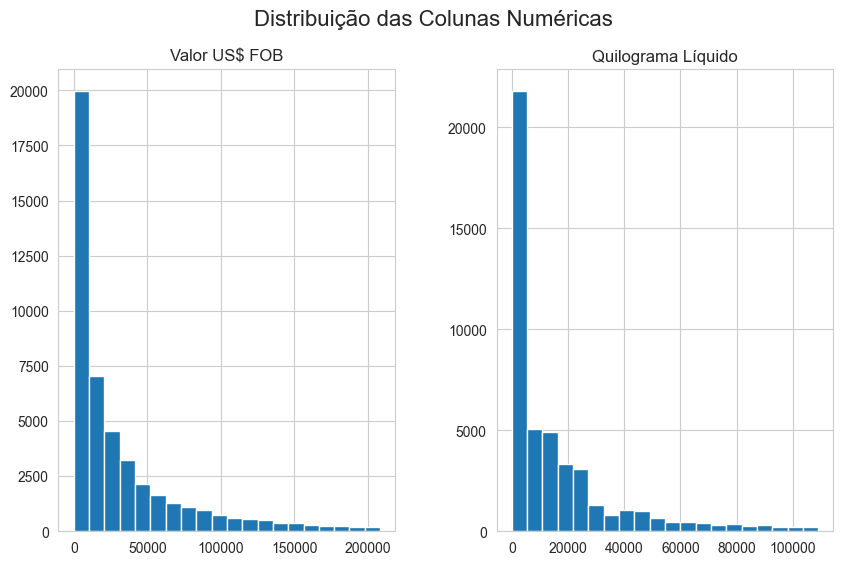

In [7]:
import matplotlib.pyplot as plt

# Plotar histogramas para as variáveis numéricas
dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribuição das Colunas Numéricas', fontsize=16)
plt.show()


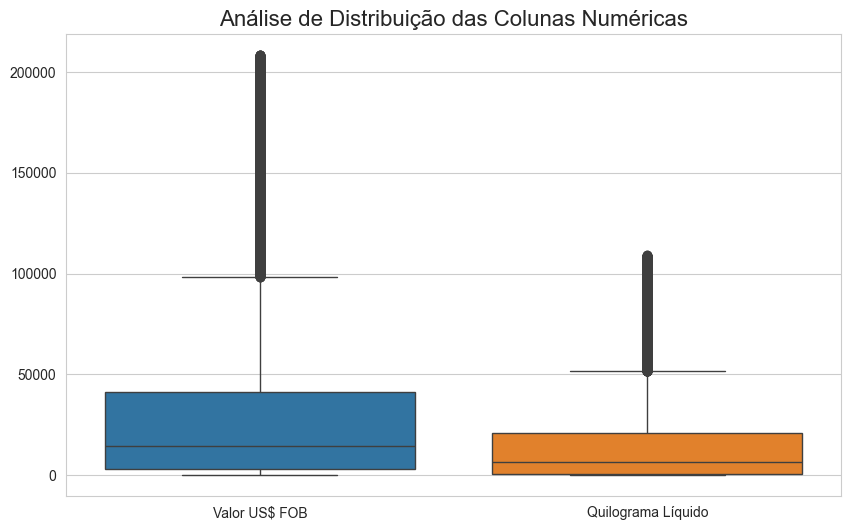

In [8]:
import seaborn as sns

# Plotar boxplots para as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']])
plt.title('Análise de Distribuição das Colunas Numéricas', fontsize=16)
plt.show()


In [9]:
import pandas as pd

# Calcular as médias, desvios padrão e variâncias
media_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].mean()
std_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].std()
variancia_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].var()

media_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].mean()
std_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].std()
variancia_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].var()

# Criar um DataFrame com as estatísticas comparativas
df_estatisticas = pd.DataFrame({
    'Média sem Outliers': media_sem_outliers,
    'Média com Outliers': media_com_outliers,
    'Desvio Padrão sem Outliers': std_sem_outliers,
    'Desvio Padrão com Outliers': std_com_outliers,
    'Variância sem Outliers': variancia_sem_outliers,
    'Variância com Outliers': variancia_com_outliers
})

df_estatisticas


,Média sem Outliers,Média com Outliers,Desvio Padrão sem Outliers,Desvio Padrão com Outliers,Variância sem Outliers,Variância com Outliers
Valor US$ FOB,31369.424339,163396.669064,41268.121585,1.271327e+06,1.703058e+09,1.616273e+12
Quilograma Líquido,15575.917056,589761.668574,21515.509801,6.669498e+06,4.629172e+08,4.448221e+13


# Definindo bases de dados normalizadas


# Análise da distribuição dos dados

C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 57135.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46272.
  res = hypotest_fun_out(*samples, **kwds)



Teste de Shapiro-Wilk para Valor US$ FOB:
Com Outliers - Estatística: 0.07019771473490544, p-valor: 2.0881224693189966e-165
Sem Outliers - Estatística: 0.742093678622888, p-valor: 2.503209763283413e-120

Teste de Anderson-Darling para Valor US$ FOB:
Com Outliers - Estatística: 17076.53329874661
Sem Outliers - Estatística: 3987.0311617937623
Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)
Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)


C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 57135.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46272.
  res = hypotest_fun_out(*samples, **kwds)



Teste de Shapiro-Wilk para Quilograma Líquido:
Com Outliers - Estatística: 0.05687968705795354, p-valor: 7.057299041376358e-166
Sem Outliers - Estatística: 0.72819862305565, p-valor: 8.333291654315756e-122

Teste de Anderson-Darling para Quilograma Líquido:
Com Outliers - Estatística: 20238.015651822003
Sem Outliers - Estatística: 4042.9773515909183
Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)
Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)


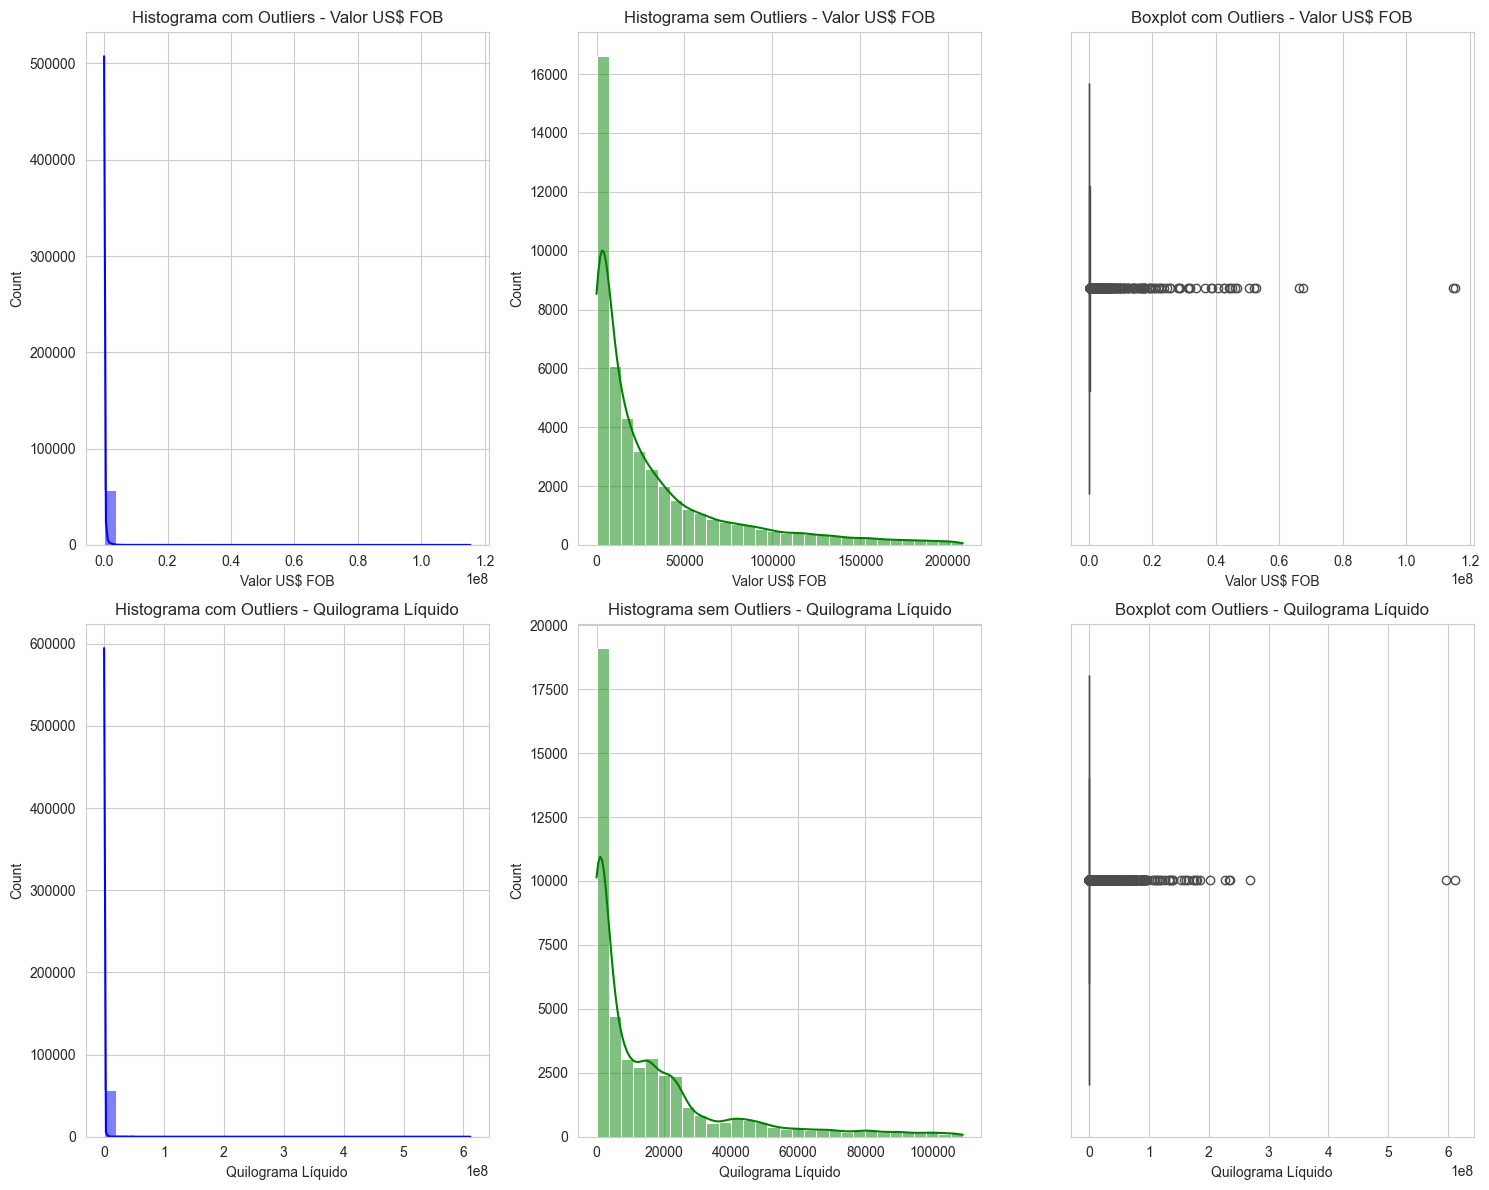

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Função para análise de distribuição com gráficos
def analisar_distribuicao(dataset_com_outliers, dataset_sem_outliers, colunas):
    # Criando a grade de gráficos
    fig, axes = plt.subplots(len(colunas), 3, figsize=(15, 6*len(colunas)))

    for i, coluna in enumerate(colunas):
        # Plotando o histograma
        sns.histplot(dataset_com_outliers[coluna], kde=True, ax=axes[i, 0], color='blue', bins=30)
        axes[i, 0].set_title(f'Histograma com Outliers - {coluna}')

        sns.histplot(dataset_sem_outliers[coluna], kde=True, ax=axes[i, 1], color='green', bins=30)
        axes[i, 1].set_title(f'Histograma sem Outliers - {coluna}')

        # Plotando o boxplot
        sns.boxplot(x=dataset_com_outliers[coluna], ax=axes[i, 2], color='blue')
        axes[i, 2].set_title(f'Boxplot com Outliers - {coluna}')

        # Teste de Shapiro-Wilk para normalidade
        stat_com_outliers, p_com_outliers = stats.shapiro(dataset_com_outliers[coluna])
        stat_sem_outliers, p_sem_outliers = stats.shapiro(dataset_sem_outliers[coluna])

        # Teste de Anderson-Darling para normalidade
        stat_anderson_com_outliers, crit_com_outliers, sig_com_outliers = stats.anderson(dataset_com_outliers[coluna], dist='norm')
        stat_anderson_sem_outliers, crit_sem_outliers, sig_sem_outliers = stats.anderson(dataset_sem_outliers[coluna], dist='norm')

        # Imprimindo os resultados dos testes de normalidade
        print(f'\nTeste de Shapiro-Wilk para {coluna}:')
        print(f'Com Outliers - Estatística: {stat_com_outliers}, p-valor: {p_com_outliers}')
        print(f'Sem Outliers - Estatística: {stat_sem_outliers}, p-valor: {p_sem_outliers}')

        print(f'\nTeste de Anderson-Darling para {coluna}:')
        print(f'Com Outliers - Estatística: {stat_anderson_com_outliers}')
        print(f'Sem Outliers - Estatística: {stat_anderson_sem_outliers}')

        # Verificando se os dados são normais com base no p-valor do Shapiro-Wilk
        if p_com_outliers > 0.05:
            print(f'Com Outliers - Os dados são normais (p-valor > 0.05)')
        else:
            print(f'Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)')

        if p_sem_outliers > 0.05:
            print(f'Sem Outliers - Os dados são normais (p-valor > 0.05)')
        else:
            print(f'Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)')

    plt.tight_layout()
    plt.show()

# Definir as colunas para análise
colunas = ['Valor US$ FOB', 'Quilograma Líquido']

# Chamar a função passando os datasets e as colunas
analisar_distribuicao(dataset_exportacoes_com_outliers, dataset_exportacoes_sem_outliers, colunas)


# Exportando bases de dados apos engenharia de atributos

In [11]:
dataset_exportacoes_com_outliers.to_csv("../../../data/interim/preprocessing/03_dataset_expo_rn_OUTLIERS_featured.csv")
dataset_exportacoes_sem_outliers.to_csv("../../../data/interim/preprocessing/03_dataset_expo_rn_NO_OUTLIERS_featured.csv")
